# 1)Reading and Understanding the Dataset

## 1.1: Import Libraries

In [3]:
#import libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
plt.style.use('Solarize_Light2')

## 1.2: Read Dataset

In [5]:
df_car = pd.read_csv(r"C:\Users\Mo\Car Price Prediction\Car details v3.csv")

## 1.3: Dataset Overview

In [7]:
df_car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [8]:
#checking the numper of rows and coulmns

def num_of_rows_and_columns(data):
    print(f"The Numper of Rows: {data.shape[0]}  \nThe Numper of Columns: {data.shape[1]}")


num_of_rows_and_columns(df_car)

The Numper of Rows: 8128  
The Numper of Columns: 13


In [9]:
#getting some informatin about the data

df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [10]:
#checking the number of missing values

def check_nulls(data):
    n_nulls = df_car.isnull().sum()
    return n_nulls

check_nulls(df_car)

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

- We have some missing values in the following columns ***[ mileage, engine, max_power, torque, seats]***

In [12]:
for col in df_car.columns:
    print(f"missing in {col} : {round(df_car[col].isnull().sum()*100/len(df_car),2)}%")

missing in name : 0.0%
missing in year : 0.0%
missing in selling_price : 0.0%
missing in km_driven : 0.0%
missing in fuel : 0.0%
missing in seller_type : 0.0%
missing in transmission : 0.0%
missing in owner : 0.0%
missing in mileage : 2.72%
missing in engine : 2.72%
missing in max_power : 2.65%
missing in torque : 2.73%
missing in seats : 2.72%


- As it becomes clear to us that the percentage of nulls is less than **3%** we can fall from the data 

### - summery stats

In [15]:
#numerical summery stats

def num_summery_stats(data):
    num_summery = data.describe().T
    return num_summery

num_summery_stats(df_car)

,count,mean,std,min,25%,50%,75%,max
year,8128.0,2013.804011,4.044249,1983.0,2011.0,2015.0,2017.0,2020.0
selling_price,8128.0,638271.807702,806253.403508,29999.0,254999.0,450000.0,675000.0,10000000.0
km_driven,8128.0,69819.510827,56550.554958,1.0,35000.0,60000.0,98000.0,2360457.0
seats,7907.0,5.416719,0.959588,2.0,5.0,5.0,5.0,14.0


In [16]:
#categorical summery stats

def cat_summery_stats(data):
    cat_summery = data.describe(include="object").T
    return cat_summery


cat_summery_stats(df_car)

,count,unique,top,freq
name,8128,2058,Maruti Swift Dzire VDI,129
fuel,8128,4,Diesel,4402
seller_type,8128,3,Individual,6766
transmission,8128,2,Manual,7078
owner,8128,5,First Owner,5289
mileage,7907,393,18.9 kmpl,225
engine,7907,121,1248 CC,1017
max_power,7913,322,74 bhp,377
torque,7906,441,190Nm@ 2000rpm,530


In [17]:
#checking the distribution of catgorical data

def check_dist_of_categ(data , col_name):
    for col in col_name:
        print(f"Distribution of column {col} : \n\n{data[col].value_counts()}")

check_dist_of_categ(df_car,['fuel','seller_type','transmission','owner'])

Distribution of column fuel : 

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64
Distribution of column seller_type : 

seller_type
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: count, dtype: int64
Distribution of column transmission : 

transmission
Manual       7078
Automatic    1050
Name: count, dtype: int64
Distribution of column owner : 

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64


## 2)Data Preprocessing

### 2.1: Feature Transformation

**"Year" shows the car model year. We can replace this column with the cars age attribute.To calculate the age, we consider the origin time to be The difference between the year 2024 and the car model year:**

In [21]:
#Transformation in Year column

df_car['Age'] = 2024 - df_car['year']
df_car.drop('year', axis=1, inplace=True)
df_car.sample(10)

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Age
5284,Maruti Swift Dzire VDi,250000,100000,Diesel,Individual,Manual,Third Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,12
6736,Maruti Alto 800 LXI,206000,120000,Petrol,Individual,Manual,Second Owner,22.74 kmpl,796 CC,47.3 bhp,69Nm@ 3500rpm,5.0,10
1641,Maruti Baleno Delta 1.2,560000,20000,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1 bhp,115Nm@ 4000rpm,5.0,6
4080,Mahindra XUV500 W10 2WD,1350000,25000,Diesel,Individual,Manual,First Owner,16.0 kmpl,2179 CC,140 bhp,330Nm@ 1600-2800rpm,7.0,7
5392,Maruti Celerio ZXI Optional,415000,46000,Petrol,Dealer,Manual,First Owner,21.63 kmpl,998 CC,67.04 bhp,90Nm@ 3500rpm,5.0,10
3409,Lexus ES 300h,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0,5
4920,Honda City 2017-2020 VTEC,150000,80000,Petrol,Individual,Manual,Second Owner,16.9 kmpl,1497 CC,100 bhp,"13.5@ 4,800(kgm@ rpm)",5.0,18
6237,Chevrolet Enjoy 1.3 TCDi LS 7,420000,110000,Diesel,Individual,Manual,Second Owner,18.2 kmpl,1248 CC,73.74 bhp,172.5Nm@ 1750rpm,7.0,8
2413,Chevrolet Captiva 2.2 LTZ AWD,700000,50000,Diesel,Individual,Automatic,Second Owner,12.12 kmpl,2231 CC,184 bhp,424Nm@ 2000rpm,7.0,12
1190,Mahindra Scorpio 2.6 SLX Turbo 7 Seater,229999,80000,Diesel,Individual,Manual,Second Owner,10.5 kmpl,2179 CC,120 bhp,290Nm@ 1800-2800rpm,7.0,18


In [22]:
#Transformation in  column


def convert_column_to_num(x):
    x = str(x)
    tokens = x.split(' ') # split the values by ' ' putting them into list
    if len(tokens) == 2:
        return float(tokens[0]) # this will return only the first integer number and ignores the measuring unit
    try:
        return float(x)
    except:
        return None

In [23]:
#Transformation in mileage column

df_car['mileage'] = df_car['mileage'].apply(convert_column_to_num)
df_car.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,10
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,10
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,18
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,14
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,17


In [24]:
#Transformation in engine column

df_car['engine'] = df_car['engine'].apply(convert_column_to_num)
df_car.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74 bhp,190Nm@ 2000rpm,5.0,10
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0,10
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,18
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90 bhp,22.4 kgm at 1750-2750rpm,5.0,14
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,17


In [33]:
#Transformation in max_power column


df_car['max_power'] = df_car['max_power'].apply(convert_column_to_num)

print(df_car['max_power'].dtype)

float64


### 2.2: Dlete the nulls

In [36]:
df_car.dropna(inplace=True)

## 3)Exploratory Data Analysis (EDA)

### 3.1: Numerical Variables Univariate Analysis

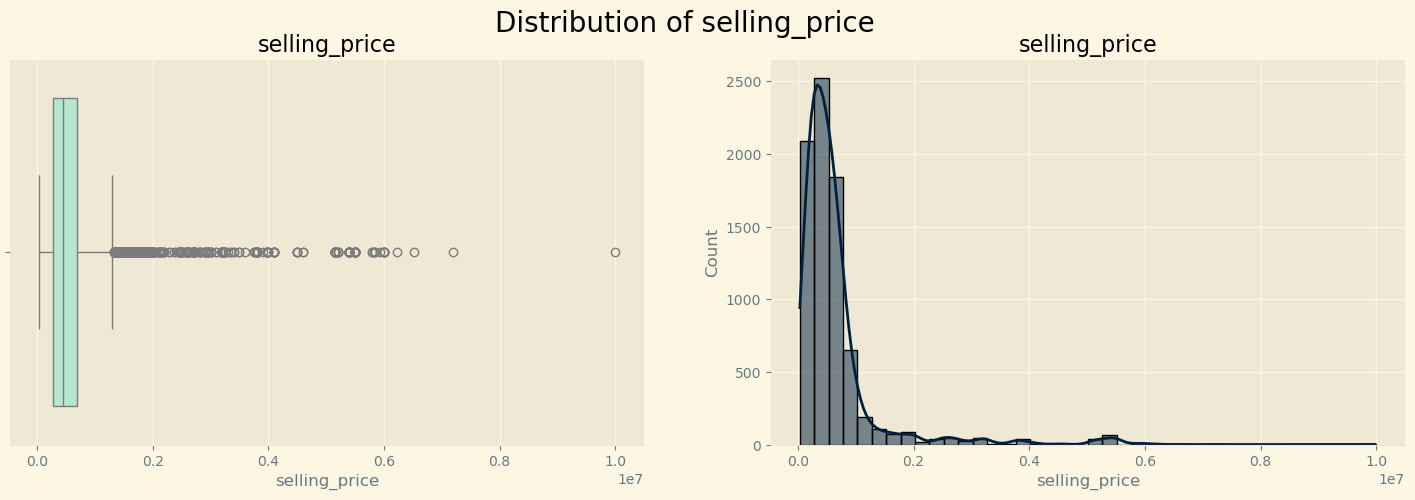

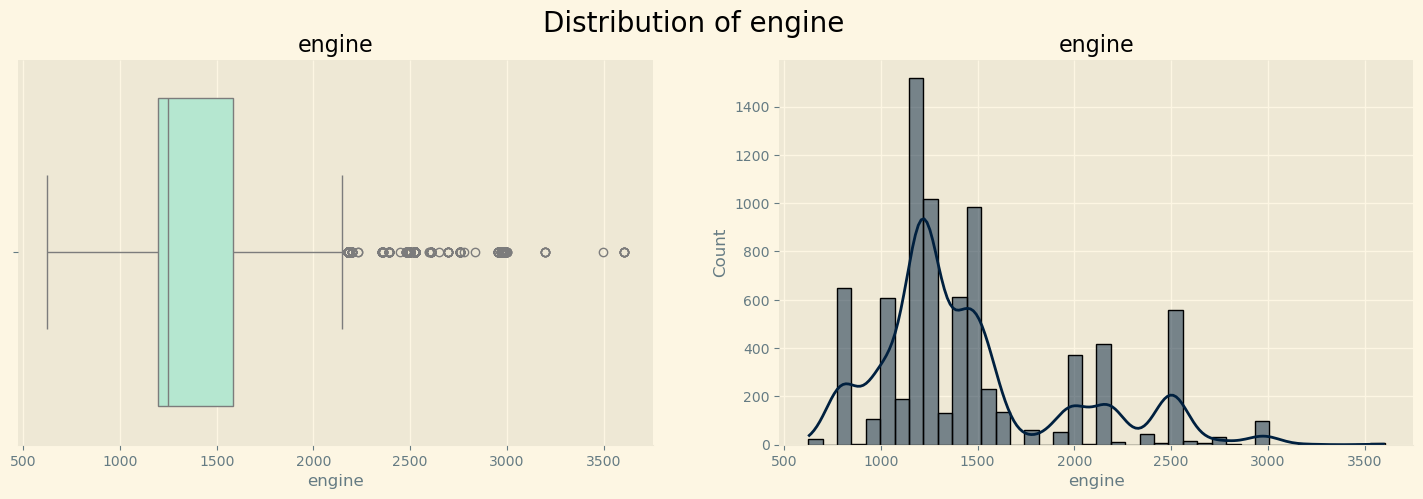

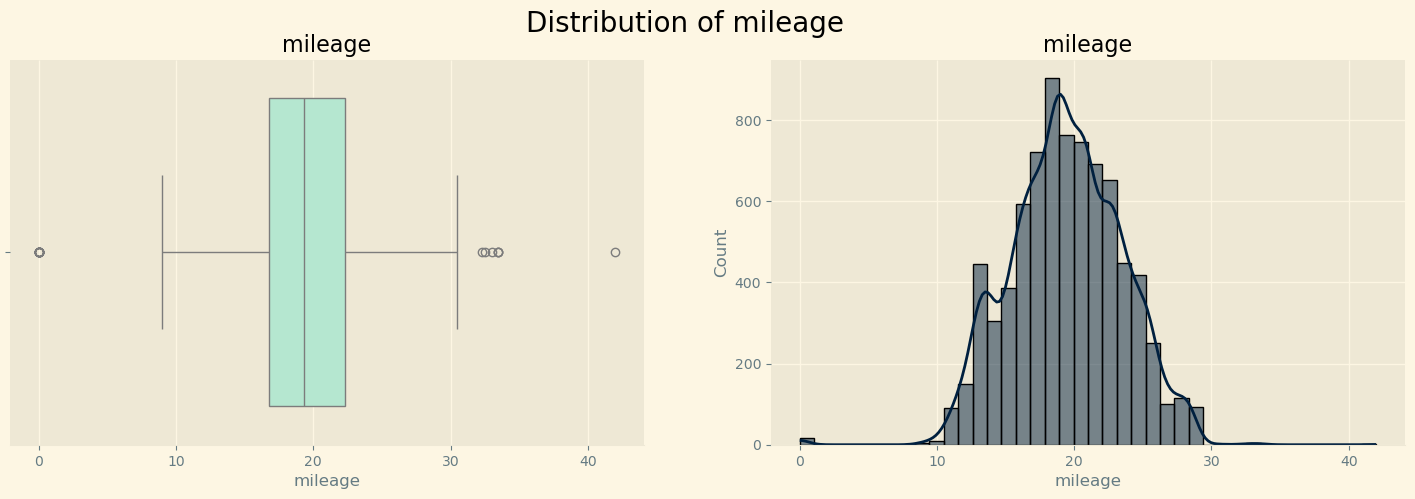

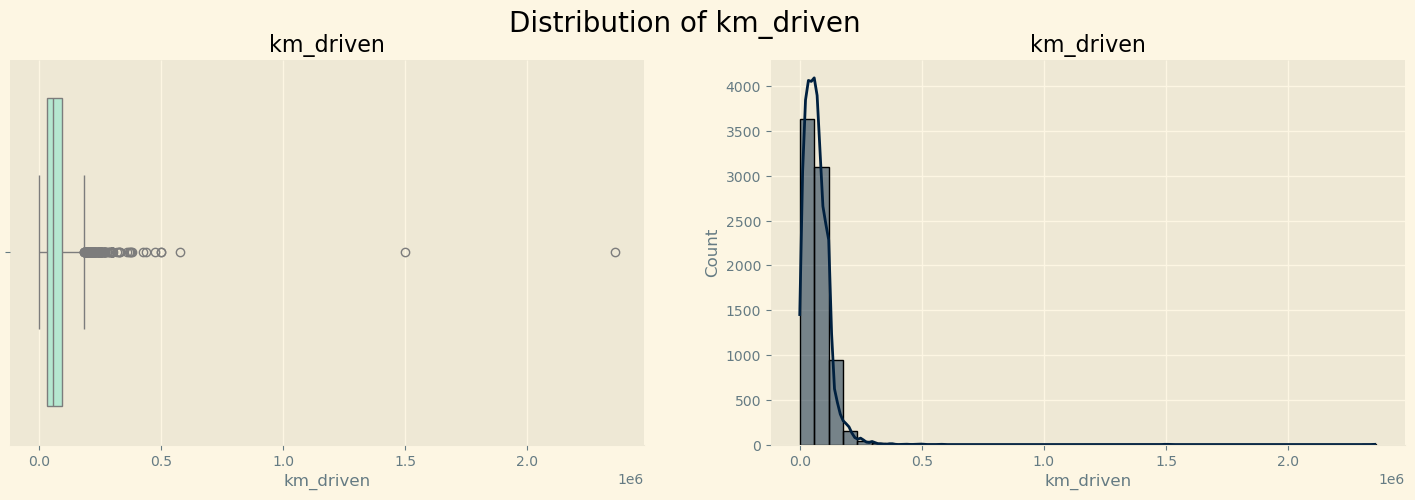

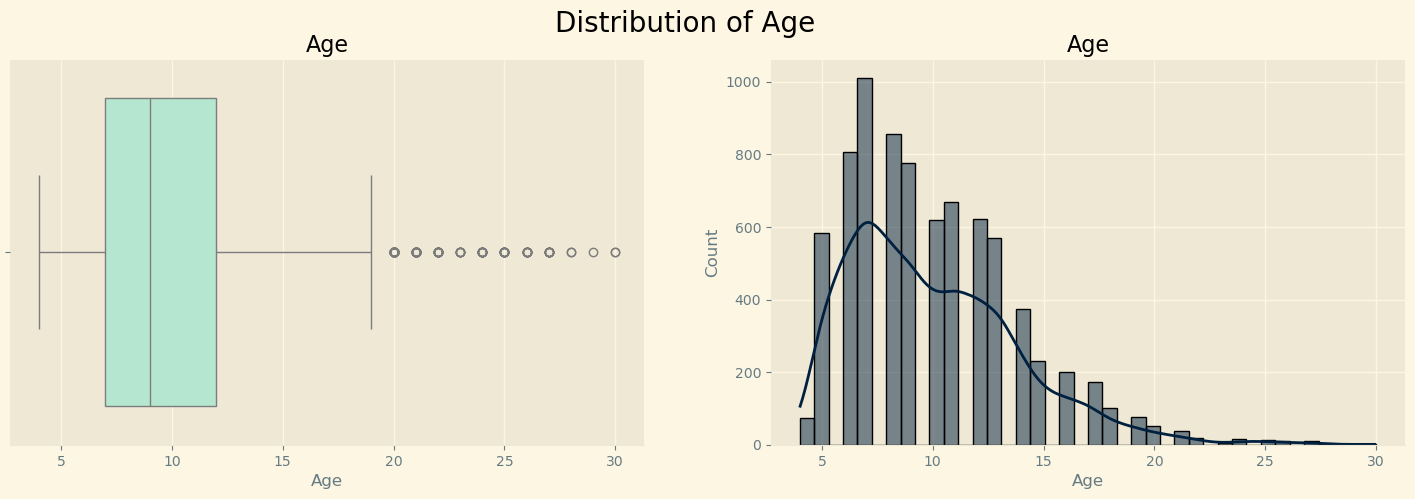

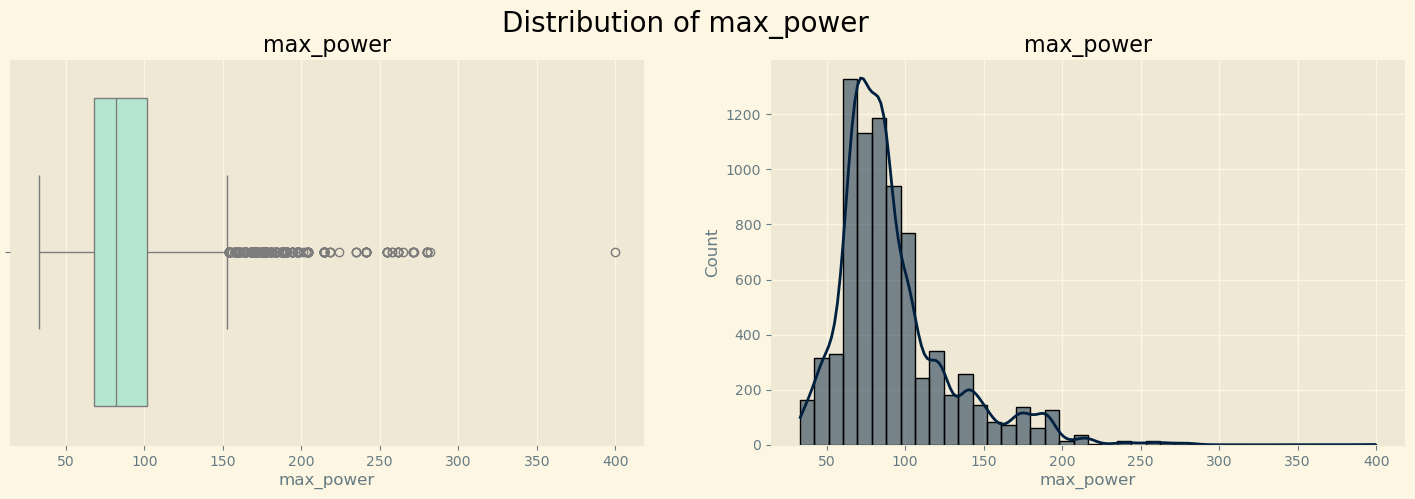

In [39]:
#display distrabution & outliers

Num_colmns = ['selling_price', 'engine', 'mileage', 'km_driven', 'Age', 'max_power']

for col in Num_colmns:
    plt.figure(figsize=(18,5))
    plt.subplot(1,2,1)
    sns.boxplot(x=df_car[col], color="#ADEFD1FF" )
    plt.title(col)
    plt.subplot(1,2,2)
    sns.histplot(x=df_car[col], bins=40, kde=True, color="#00203FFF")
    plt.title(col)   
    sns.despine(left=True)
    plt.suptitle(f'Distribution of {col}', fontsize=20)
    plt.show()

- Almost all variables are  right skewed!

### 3.2: Categorical Variables Univariate Analysis

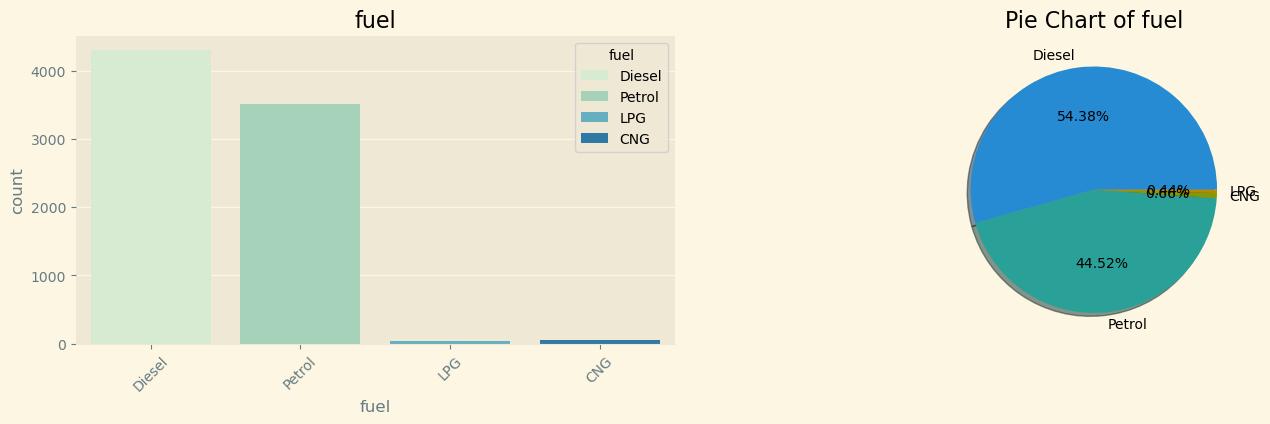

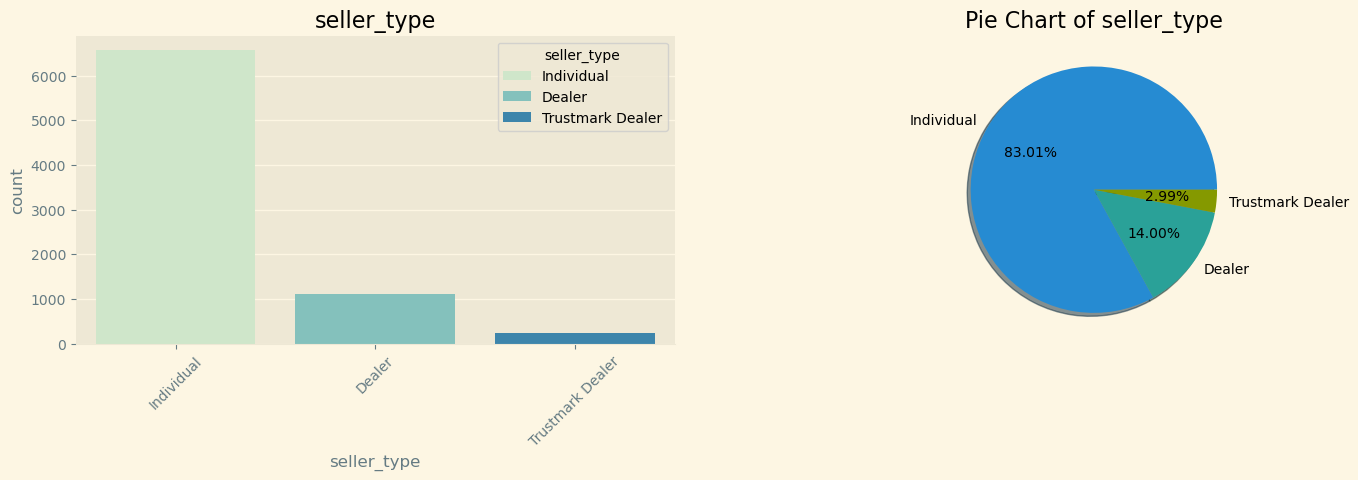

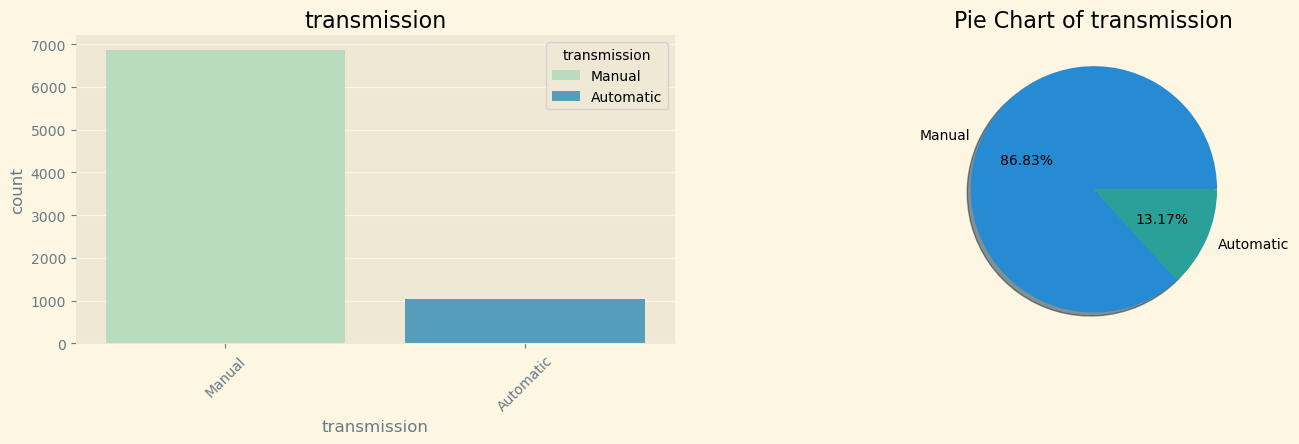

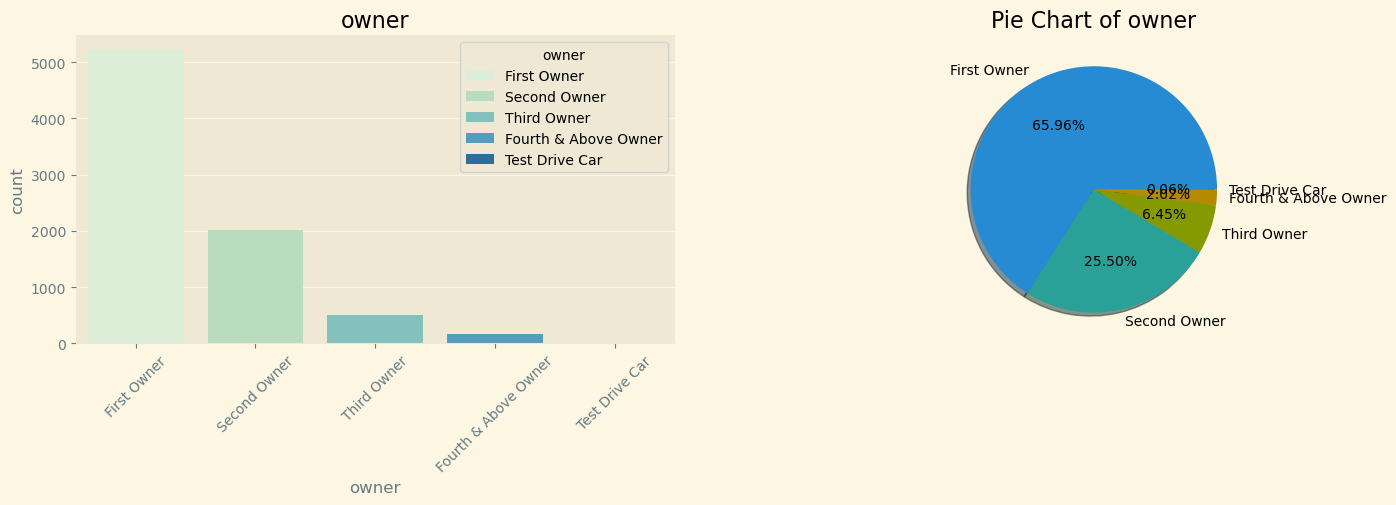

In [42]:
#Display the distrabution of categorical columns 

Cat_Cols  = ['fuel','seller_type','transmission','owner']
for col in Cat_Cols:
    plt.figure(figsize = (17, 4))
    plt.subplot(1,2,1)
    sns.countplot(x= df_car[col],hue=df_car[col],legend=True ,data =df_car ,palette = 'GnBu') 
    plt.xticks(rotation=45)
    plt.title(col) 
    sns.despine(left=True)
    plt.subplot(1,2,2)
    counts = df_car[col].value_counts()  # Get counts of unique values
    plt.pie(counts, labels=counts.index, autopct='%.2f%%', shadow=True, center=(0, 0), radius=1)
    plt.title(f'Pie Chart of {col}')
    plt.show()


### Conclusion:
****There are 3 Fuel_Type categories. Petrol has the highest frequency and CNG has the least frequency.****

****There are 2 Seller_Type categories. Dealer has the highest frequency and Individual has the least frequency.****

****There are 2 Transmission categories. Manual has the highest frequency and Automatic has the least frequency.****

****There are 3 Owner categories. (0) has the highest frequency and (3) has the least frequency.****

### 3.3: Selling_Price vs. Numerical Features Bivariate Analysis

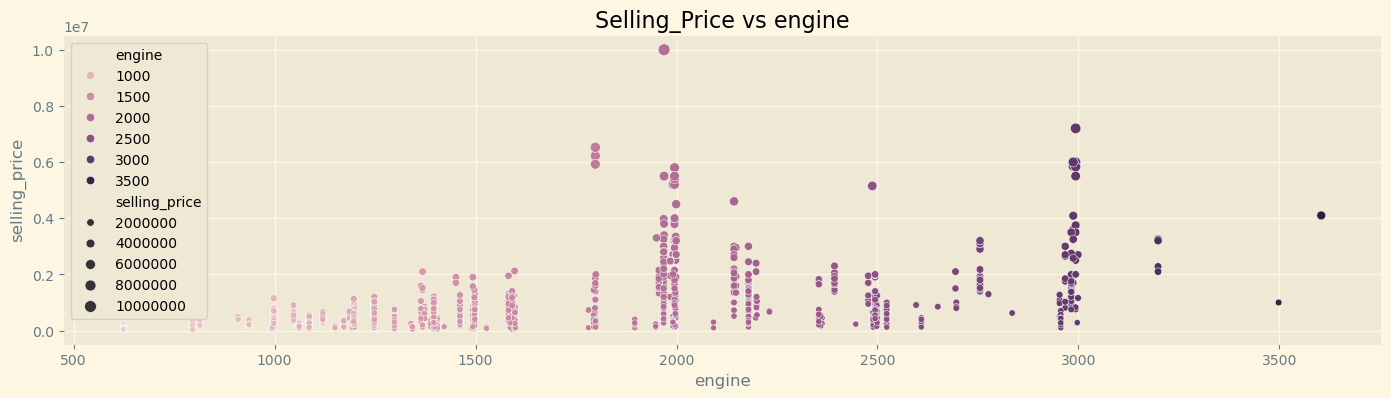

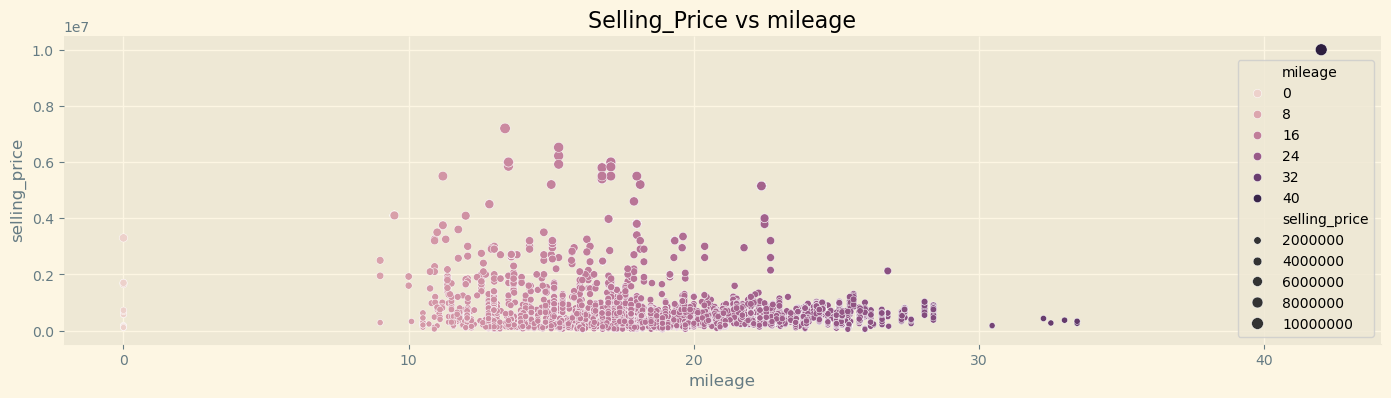

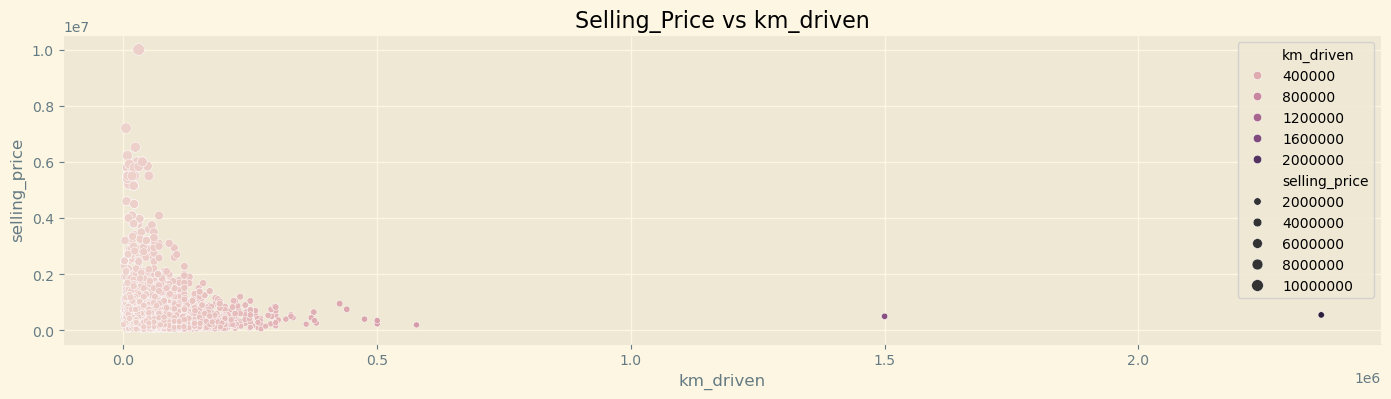

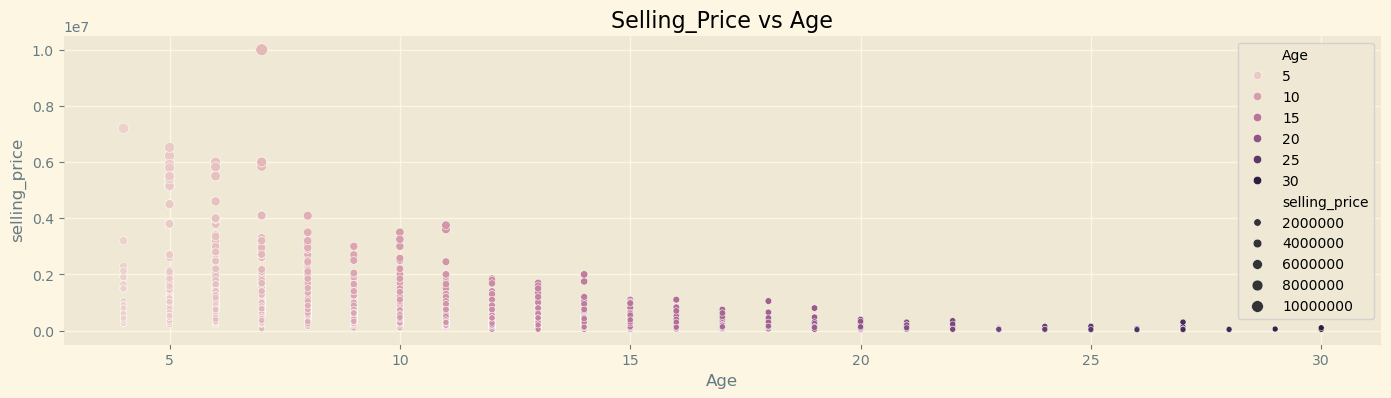

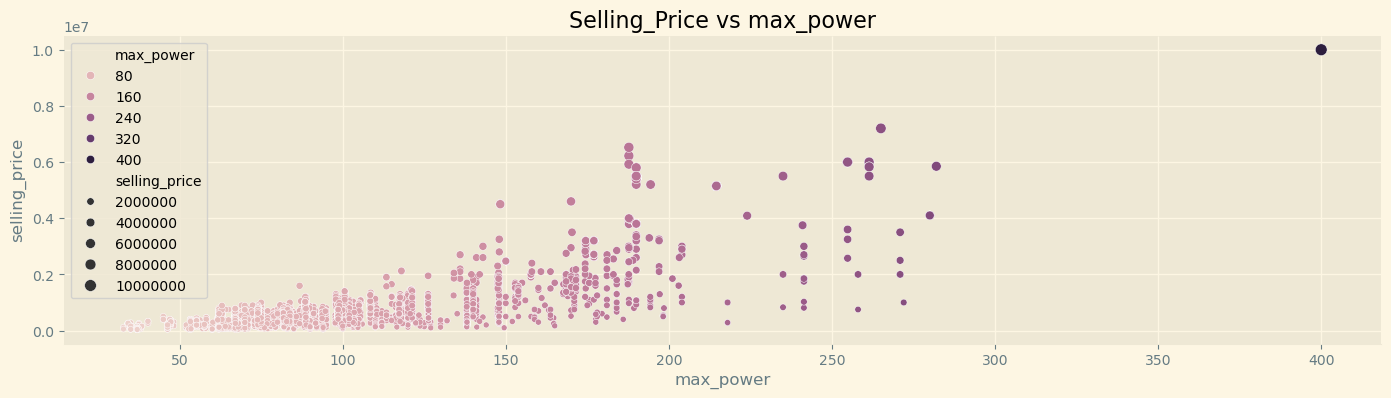

In [45]:
#Display the distrabution of categorical columns 

Num_Cols = [ 'engine', 'mileage', 'km_driven', 'Age', 'max_power']
for col in Num_Cols:
    plt.figure(figsize = (17, 4))
    plt.subplot(1,1,1)
    sns.scatterplot(x= df_car[col],y=df_car['selling_price'] ,data =df_car ,hue=col ,size= df_car['selling_price'])   
    plt.title(f"Selling_Price vs {col}") 
    sns.despine(left=True)
    plt.show()

### 3.4: Selling_Price vs. Categorical Features Bivariate Analysis

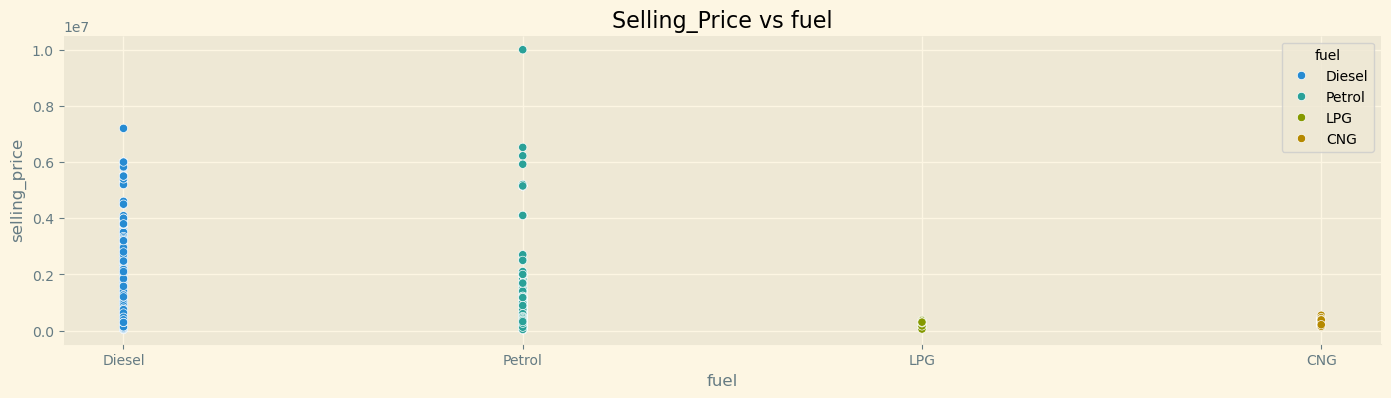

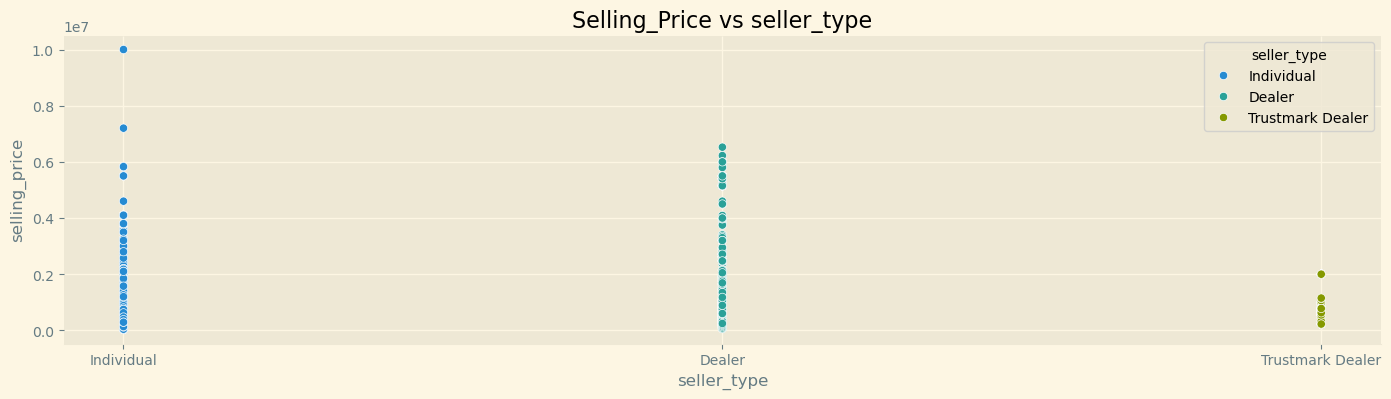

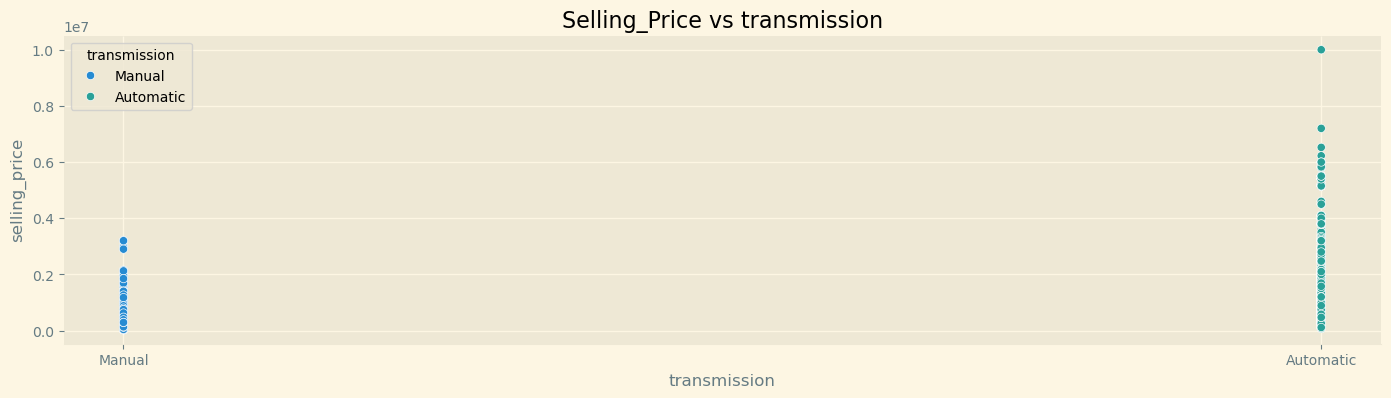

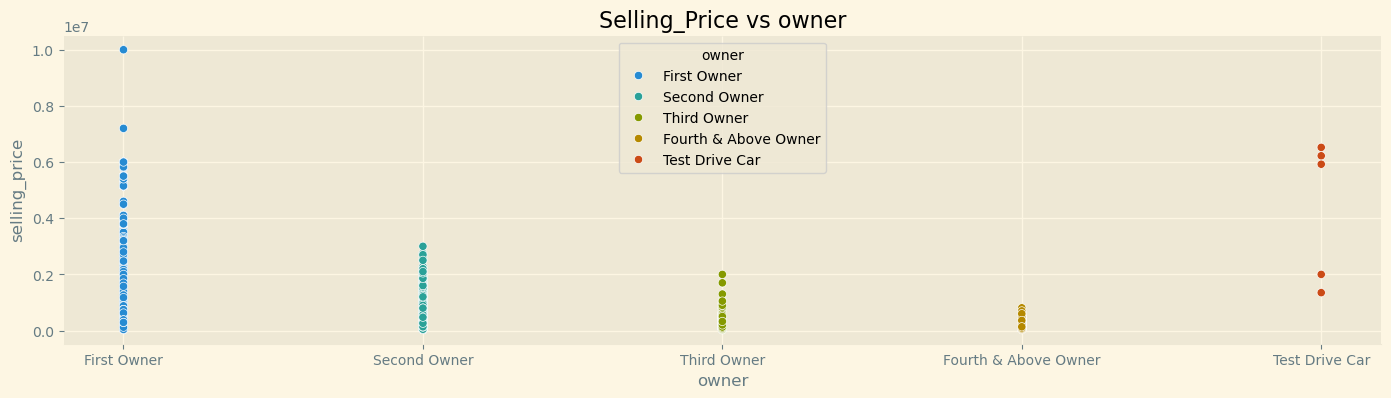

In [47]:
#Display the distrabution of categorical columns 

Cat_Cols  = ['fuel','seller_type','transmission','owner']
for col in Cat_Cols:
    plt.figure(figsize = (17, 4))
    plt.subplot(1,1,1)
    sns.scatterplot(x= df_car[col],y=df_car['selling_price'],
                    hue=df_car[col],legend=True ,data =df_car )   
    plt.title(f"Selling_Price vs {col}") 
    sns.despine(left=True)
    plt.show()

### 3.5: Categorical Variables Encoding
We implement dummy encoding on categorical columns, since they are all nominal variables:

In [49]:
CCat_Cols  = ['fuel','seller_type','transmission','owner']

df_car_copy = df_car.copy()

df_car_copy = pd.get_dummies(df_car_copy, columns=Cat_Cols, dtype=float , drop_first=True)
df_car_copy.head(5)

,name,selling_price,km_driven,mileage,engine,max_power,torque,seats,Age,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti Swift Dzire VDI,450000,145500,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,10,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,10,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,Honda City 2017-2020 EXi,158000,140000,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,18,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,Hyundai i20 Sportz Diesel,225000,127000,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,14,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Maruti Swift VXI BSIII,130000,120000,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,17,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [50]:
df_car_copy.drop(['name','torque'],axis=1, inplace=True)


### 3.6:  Correlation Analysis

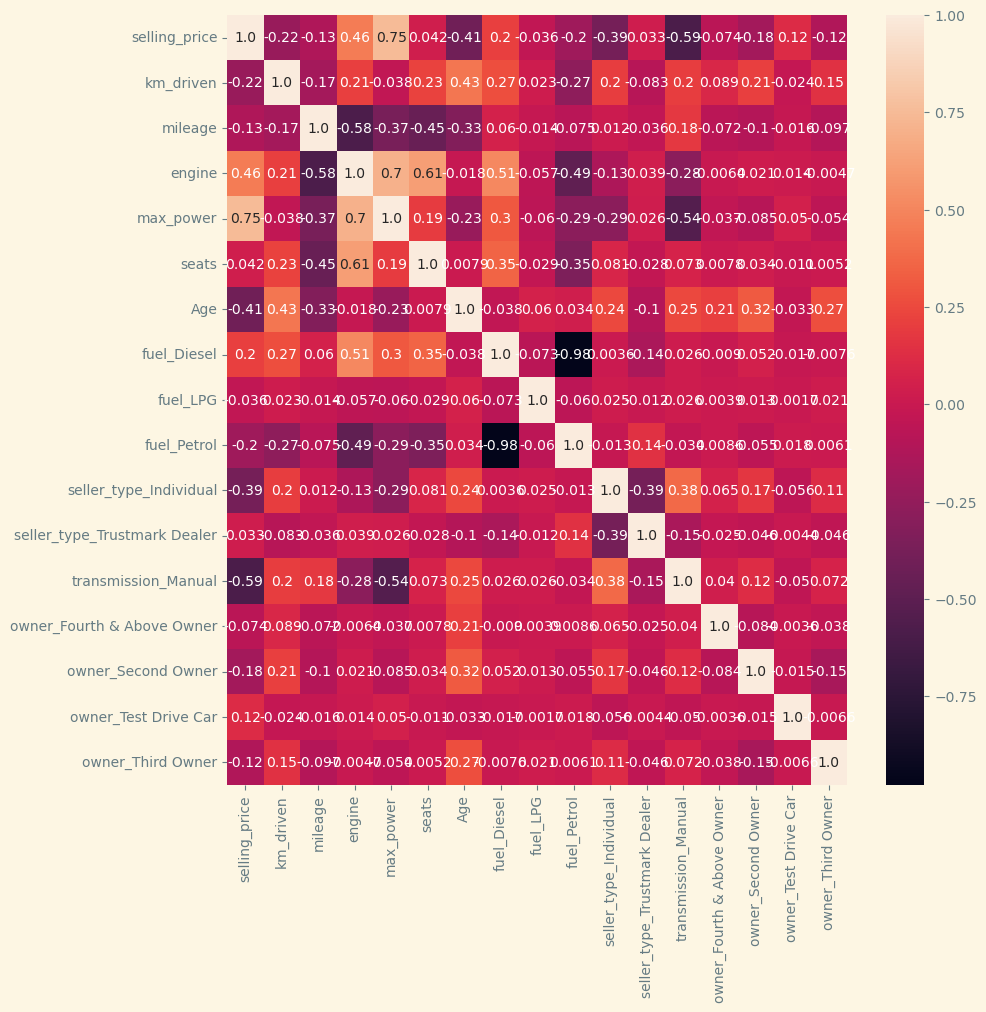

In [52]:
#display heatmap for correlation

fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(df_car_copy.corr(), annot=True, fmt=".2")
plt.show()

In [56]:
#show the correlation between variables & Selling_Price

df_corr = pd.DataFrame(abs(df_car_copy.corr()['selling_price'])).sort_values(by='selling_price',ascending=False)
df_corr

,selling_price
selling_price,1.000000
max_power,0.749674
transmission_Manual,0.590269
engine,0.455682
Age,0.412302
seller_type_Individual,0.386151
km_driven,0.222158
fuel_Diesel,0.204831
fuel_Petrol,0.195074
owner_Second Owner,0.178786


- The target variable "Selling Price" is highly correlated with max_power & engine & transmission_Manual.
- Some independent variables like Fuel_Type_Petrol and Fuel_Type_Disel are highly correlated, which is called Multicollinearity.

## 4)Train-Test Split

In [59]:
#sepreating the data and Target

X = df_car_copy.drop(columns=['selling_price'], axis=1)
Y = df_car_copy['selling_price']

In [61]:
#Scaling the X to make model learning easly

scale = StandardScaler()
scaled_X = scale.fit_transform(X)

In [63]:
#split data for train data & test data

X_train, X_test, y_train, y_test = train_test_split(scaled_X, Y, test_size=.2, random_state=42, shuffle=True)

In [67]:
#shape of spliting data
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (6324, 16)
X_test shape:  (1582, 16)
y_train shape:  (6324,)
y_test shape:  (1582,)


## 5)Model Creation/Evaluation

In [100]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = metrics.r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = metrics.r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=10)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model*100,2),"%")
    print("Test R2-score :",round(R2_test_model*100,2),"%")
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean*100,2),"%")

# Linear Regression Model

In [104]:
lr = LinearRegression()
car_pred_model(lr,"Linear_reg")

Train R2-score : 68.27 %
Test R2-score : 68.72 %
Train CV scores : [0.69813618 0.68604847 0.62171087 0.65695823 0.71174777 0.6142136
 0.7241655  0.66708515 0.70379111 0.69238176]
Train CV mean : 67.76 %


# Random Forest Model


In [115]:
rf = RandomForestRegressor()
car_pred_model(rf,"Random Forest")

Train R2-score : 99.48 %
Test R2-score : 98.42 %
Train CV scores : [0.97448007 0.95783565 0.94182437 0.95651495 0.9798848  0.97656657
 0.96902399 0.92145813 0.98227189 0.96978429]
Train CV mean : 96.3 %


# Bagging Model


In [123]:
br = BaggingRegressor(n_estimators=200, random_state=0)
car_pred_model(br, "Bagging")


Train R2-score : 99.51 %
Test R2-score : 98.37 %
Train CV scores : [0.97314853 0.95968068 0.94247262 0.95758332 0.98171577 0.97782928
 0.96772076 0.92005798 0.98254315 0.96738881]
Train CV mean : 96.3 %


# Gradient Boosting Model


In [124]:
gbr = GradientBoostingRegressor()
car_pred_model(gbr, "Gradient Boosting")

Train R2-score : 97.11 %
Test R2-score : 96.82 %
Train CV scores : [0.966449   0.93849131 0.93975602 0.94141251 0.97063555 0.96821802
 0.96287712 0.91595397 0.97463978 0.96036938]
Train CV mean : 95.39 %


# Decision Tree Regressor


In [127]:
dtr = DecisionTreeRegressor()
car_pred_model(dtr, "Decision Tree")

Train R2-score : 99.96 %
Test R2-score : 96.36 %
Train CV scores : [0.97002594 0.93791313 0.94192321 0.93241973 0.94876483 0.96637605
 0.97338518 0.9338975  0.94907785 0.9291009 ]
Train CV mean : 94.83 %


# XGBoost


In [131]:
xgboost = XGBRegressor()
car_pred_model(xgboost, "XGBoost")

Train R2-score : 99.52 %
Test R2-score : 98.51 %
Train CV scores : [0.97422904 0.96504658 0.94321626 0.96837062 0.98023623 0.97434527
 0.96343619 0.90025491 0.9830389  0.97048676]
Train CV mean : 96.23 %
